In [1]:
import tomosipo as ts
import numpy as np
import pickle
import mrcfile
import numpy as np
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
import os
import matplotlib.pyplot as plt
import astra
from tomosipo.geometry.parallel_vec import *
from scipy.ndimage import zoom

%matplotlib inline


In [2]:
data_name = '70s_ribsome_true_mean_random_angles'
os.makedirs(f'./data/{data_name}', exist_ok = True)

with open(f'./data/{data_name}/images.pkl', 'rb') as f:
    new_projection = pickle.load( f)
          
with open(f'./data/{data_name}/angles.pkl', 'rb') as f:
    angles2 = pickle.load( f)
          
with open(f'./data/{data_name}/orientation_matrix.pkl', 'rb') as f:
    Orientation_Vectors = pickle.load(f)
          
with open(f'./data/{data_name}/indexs.pkl', 'rb') as f:
    indexs = pickle.load(f)
print('indexs',indexs[:10])     
with open(f'./data/{data_name}/mean_subtracted_strcut.pkl', 'rb') as f:
    mean_subtracted_strcut = pickle.load(f)

indexs [4 0 3 3 3 1 3 2 4 0]


In [3]:
print(new_projection.shape)
ProjSize = 34
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
pg = ts.from_astra(Proj_geom)
Proj_geom = astra.create_proj_geom('parallel3d_vec', ProjSize, ProjSize, Orientation_Vectors)
Vol_geom = astra.create_vol_geom(34, 34, 34)
vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
A = ts.operator(vg, pg)
"""
print(pg.ray_dir[:5])
print(pg.det_v[:5])
print(pg.det_u[:5])
print(Orientation_Vectors[:5])
print(pg[:5])
"""


(15000, 34, 34)


'\nprint(pg.ray_dir[:5])\nprint(pg.det_v[:5])\nprint(pg.det_u[:5])\nprint(Orientation_Vectors[:5])\nprint(pg[:5])\n'

In [4]:
from models import EM_2SDR
n_list = [5, 15, 18]
#n_list.reverse()
b_list = [400,400, 400, 400,400 , 400]#, 100]
#b_list.reverse()
iter_list = [20 for i in range(len(n_list))]

for i in range(len(n_list)):
    n = n_list[i]
    b = b_list[i]
    niter = iter_list[i]
    Images = new_projection
    print(Images.shape)
    exp_name = f'20220207_{data_name}_EM_2SDR_n_{n}_new'
    ProjSize, num_image, n_component , num_iter = 34, new_projection.shape[0], n, niter
    batch_size = b
    Vol_geom = astra.create_vol_geom(34, 34, 34)
    #Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

    vg = ts.from_astra(Vol_geom)
    pg = ts.from_astra(Proj_geom)
    op = ts.operator(vg, pg)
    MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)
    MP3.fit(start_ratio = 0.1)

(15000, 34, 34)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:76: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272097173/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1937.)
  self.U1.data = torch.qr(self.U1.data)[0]
/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal erro

Traceback (most recent call last):
  File "/home/users/lewis841214/.conda/envs/protein_reconstruction/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-3daa6b9bd63a>", line 24, in <module>
    MP3.fit(start_ratio = 0.1)
  File "/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py", line 394, in fit
    self.Draw_Kmean_tsne(0)
  File "/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py", line 487, in Draw_Kmean_tsne
    self.Output_colection(num_batch)
  File "/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py", line 476, in Output_colection
    self.Expectation()
  File "/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py", line 164, in Expectation
    UTATAU = torch.matmul(self.AU.permute(0,2,1), self.AU)
K

KeyboardInterrupt: 

In [5]:
from models import EM_2SDR

n = 18
b = 400
niter = 50
Images = new_projection
print(Images.shape)
exp_name = f'20220208_{data_name}_EM_2SDR_n_{n}_new_concate_15'
ProjSize, num_image, n_component , num_iter = 34, new_projection.shape[0], n, niter
batch_size = b
Vol_geom = astra.create_vol_geom(34, 34, 34)
#Images = torch.ones(num_image, 48, 48) # fake images for computing purpose

vg = ts.from_astra(Vol_geom)
pg = ts.from_astra(Proj_geom)
op = ts.operator(vg, pg)
MP3 = EM_2SDR(ProjSize, num_image, n_component, op , Images,Orientation_Vectors, exp_name,mean_subtracted_strcut, indexs, batch_size, niter)


(15000, 34, 34)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.018s...
[t-SNE] Computed neighbors for 400 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 6.709596
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.994846
[t-SNE] KL divergence after 1000 iterations: 0.306244
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each 

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:550: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


tensor([4.7615e-07, 4.6321e-07, 4.6956e-07, 4.8469e-07, 4.5733e-07])
self.projected_var_each tensor([4.7639e-08, 3.3361e-08, 4.4308e-08, 5.9347e-08, 3.6187e-08],
       grad_fn=<DivBackward0>)


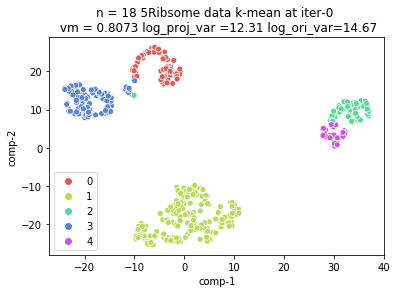

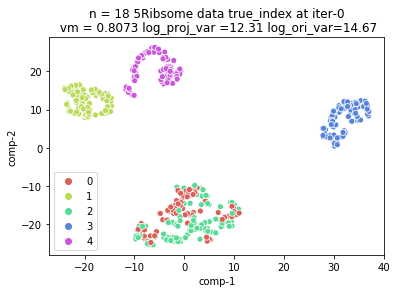

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


generated


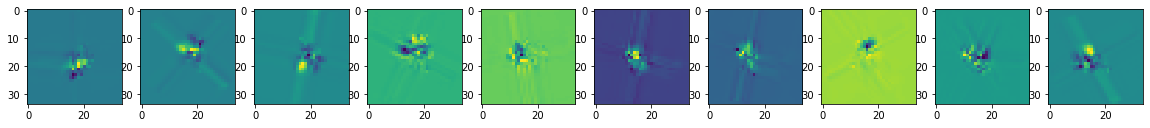

real


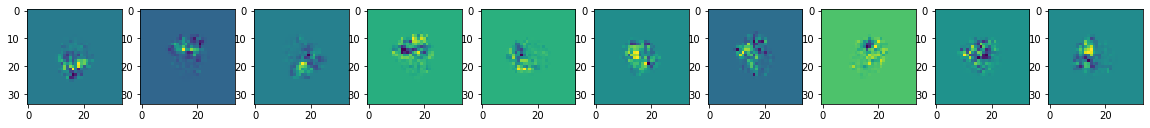

1443.2097980976105 sec
0 batch 1 iteration
generated


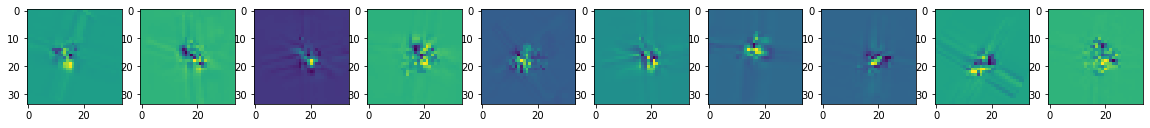

real


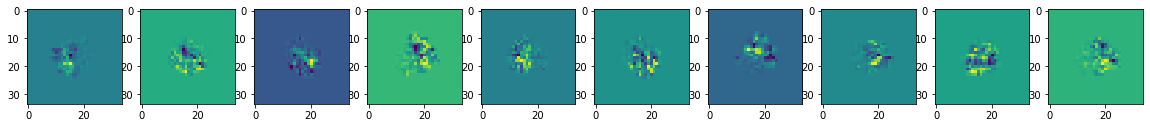

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 8.586822
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.995850
[t-SNE] KL divergence after 1000 iterations: 0.322979
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([4.7615e-07, 4.6321e-07, 4.6956e-07, 4.8469e-07, 4.5733e-07])
self.projected_var_each tensor([2.1509e-08, 1.4688e-08, 2.0209e-08, 2.5328e-08, 1.4777e-08],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:550: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


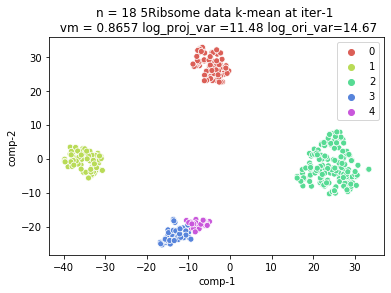

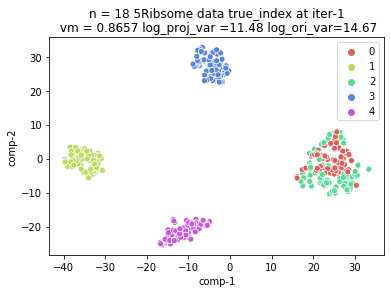

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


1419.1005885601044 sec
0 batch 2 iteration
generated


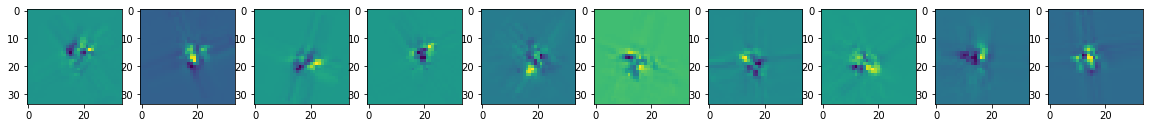

real


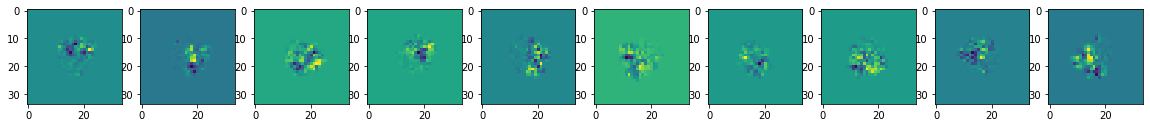

1390.9667093753815 sec
0 batch 3 iteration
generated


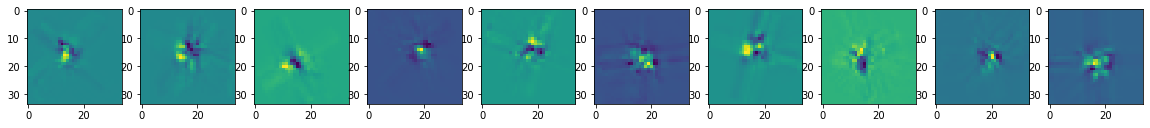

real


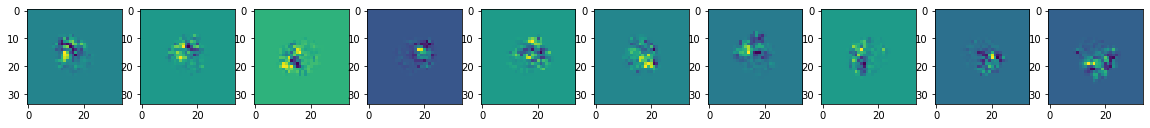

1437.7835557460785 sec
0 batch 4 iteration
generated


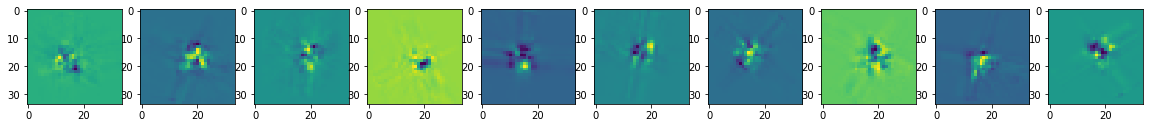

real


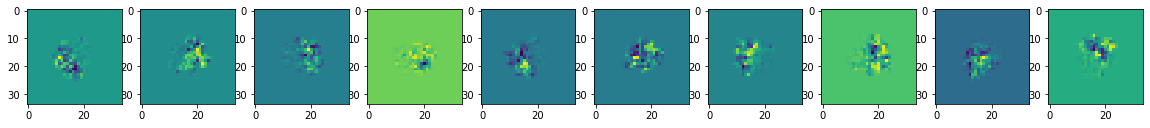

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 10.926008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.016720
[t-SNE] KL divergence after 1000 iterations: 0.270958
self.All_U_kron_shape torch.Size([39304, 5832])
self.PCs.shape torch.Size([5832, 5])
self.ori_var_each tensor([4.7615e-07, 4.6321e-07, 4.6956e-07, 4.8469e-07, 4.5733e-07])
self.projected_var_each tensor([1.0409e-08, 7.1331e-09, 9.6163e-09, 1.1473e-08, 6.0883e-09],
       grad_fn=<DivBackward0>)


/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/models.py:550: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.ms_strucs = torch.permute(torch.tensor(self.ms_strucs), (1, 0))


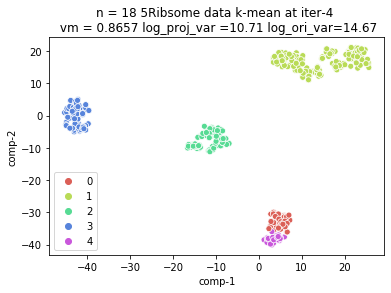

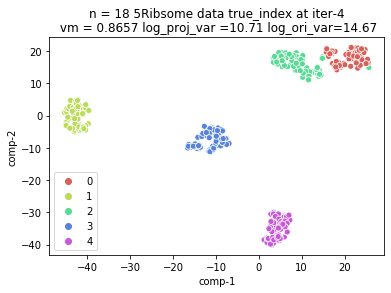

/home/users/lewis841214/Desktop/1project/CryoEMCode/GPU_CryoEM/tomosipo_structureed/tomosipo/links/torch.py:64: UserWarning: The parameter initial_value should be contiguous. It has been automatically made contiguous. Use `ts.link(x.contiguous())' to inhibit this warning. 
  f"The parameter initial_value should be contiguous. "


KeyboardInterrupt: 

In [6]:
import torch
U1 = torch.load('./snap_shot/20220207_70s_ribsome_true_mean_random_angles_EM_2SDR_n_15_new_0th_U1.pt')
U2 = torch.load('./snap_shot/20220207_70s_ribsome_true_mean_random_angles_EM_2SDR_n_15_new_0th_U2.pt')
U3 = torch.load('./snap_shot/20220207_70s_ribsome_true_mean_random_angles_EM_2SDR_n_15_new_0th_U3.pt')
MP3.U1.data[:, :15] = U1.detach()
MP3.U2.data[:, :15] = U2.detach()
MP3.U3.data[:, :15] = U3.detach()
MP3.fit(start_ratio = 0.1)

In [ ]:
#pg = ParallelVectorGeometry.from_astra(Proj_geom)


In [ ]:
#vg = ts.volume(shape=(32, 32, 32), size=(1, 1, 1))
#pg = ts.parallel(angles=50, shape=(48, 48), size=(1.5, 1.5))



In [ ]:
"""
Get original mean subtracted structs
"""
with open('./data/3DVA_subtracted_vols34_0205.pkl', 'rb') as  f:
    mean_sbtracted_structs = pickle.load(f)
print(len(mean_sbtracted_structs))
print(type(mean_sbtracted_structs[0]))
for i in range(5):
    mean_sbtracted_structs[i] = mean_sbtracted_structs[i].tolist()
mean_sbtracted_structs = np.array(mean_sbtracted_structs)
print(mean_sbtracted_structs.shape)

In [ ]:
"""
U1 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U1.pt')
U2 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U2.pt')
U3 = torch.load('./snap_shot/1229_n_22_MPCA_sigma_j_monitor_0th_55_U3.pt')
MP3.U1.data = U1.detach()
MP3.U2.data = U2.detach()
MP3.U3.data = U3.detach()
"""

#MP3.fit(start_ratio = 0.1)


In [ ]:
lr = torch.mean(torch.abs(MP3.U1)) * 0.1
print(torch.mean(torch.abs(MP3.U1)))

In [ ]:
#increase batch_size, decrease learning rate
#first load 15 trained component from n = 15 set
"""
U1 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U2 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
U3 = torch.load('./snap_shot/1227_n_18_MPCA_0th_U1.pt')
MP3.U1.data = U1.detach()
MP3.U2.data = U2.detach()
MP3.U3.data = U3.detach()

"""




#MP3.fit(start_ratio = 0.1)



In [ ]:
MP3.Output_colection()
Coef = np.array(MP3.All_mu)
#Then perform PCA of T-SNE on allMu
print(Coef.shape)

In [ ]:

tsne = TSNE(n_components=2, verbose=1, random_state=123)

"""
x = Coef.reshape(5000, -1)
z = tsne.fit_transform(x) 
"""


In [ ]:
import numpy as np
"""
np.random.seed(0)

indexs = np.random.randint(5, size = 5000)
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 

"""


In [ ]:
print(Coef.shape)
Coef = Coef.reshape(9200, -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)
print(P_Coef.shape)

In [ ]:
z = tsne.fit_transform(P_Coef) 
import numpy as np
np.random.seed(0)


In [ ]:
print(z.shape)
#print(len(indexs))

indexs = Index_3DVA[:9200]
print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data true label") 


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(P_Coef) #k-mean perform on PCA coef
kmeans.labels_

df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="5Ribsome data k-mean") 

In [ ]:

print(v_measure_score(indexs, kmeans.labels_))